# Import Libraries and Load Data

In [1]:
# Data Manipulation
import pandas as pd

# Numerical Analysis
import numpy as np

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Image Processing
import cv2

Before exploring and visualizing the data, first we need to get the data frame that consists of all information that we got in the Data Extraction notebook.

In [2]:
annotations_info_df = pd.read_csv('/content/drive/MyDrive/BOOTCAMP FINAL SEASON/Acceleration Program Scholarship/Deep Learning Final Project/annotations_info.csv')
annotations_info_df.head()

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,cropped_image_file
0,28,55,46,71,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737-0.png
1,98,62,111,78,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737-1.png
2,159,50,193,90,mask_incorrectly_worn,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737-2.png
3,293,59,313,80,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737-3.png
4,352,51,372,72,with_mask,maksssksksss737,400,226,maksssksksss737.xml,maksssksksss737.png,maksssksksss737-4.png


In [4]:
import zipfile
from google.colab import drive

drive.mount('/content/drive', force_remount = True)
zipped_cropped_images_path = '/content/drive/MyDrive/BOOTCAMP FINAL SEASON/Acceleration Program Scholarship/Deep Learning Final Project/zipped_cropped_images.zip'
zip_ref = zipfile.ZipFile(zipped_cropped_images_path, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Mounted at /content/drive


This path consist of train dataset, test dataset, as well as a zip file consisting all cropped images.

In [57]:
!ls '/content/drive/MyDrive/BOOTCAMP FINAL SEASON/Acceleration Program Scholarship/Deep Learning Final Project'

annotations_info.csv  test_df.csv  train_df.csv  zipped_cropped_images.zip


In [58]:
unzipped = !unzip '/content/drive/MyDrive/BOOTCAMP FINAL SEASON/Acceleration Program Scholarship/Deep Learning Final Project/zipped_cropped_images.zip'
unzipped

['Archive:  /content/drive/MyDrive/BOOTCAMP FINAL SEASON/Acceleration Program Scholarship/Deep Learning Final Project/zipped_cropped_images.zip',
 'replace maksssksksss0-978.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: ']

# Train Test Split

The main purpose of train test split is to see if our model is able to generalize (performs well both in training and testing). Here, we need to divide our data with stratified splitting to make sure our label distribution in training is similar in the testing data.

In [81]:
from sklearn.model_selection import train_test_split

X = annotations_info_df.drop('label', axis = 'columns')
y = annotations_info_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

In [82]:
y_train.value_counts()

with_mask                2585
without_mask              574
mask_incorrectly_worn      98
Name: label, dtype: int64

In [83]:
y_test.value_counts()

with_mask                647
without_mask             143
mask_incorrectly_worn     25
Name: label, dtype: int64

In [84]:
y_train.value_counts()['with_mask'] / y_train.value_counts()['without_mask']

4.503484320557491

In [85]:
y_test.value_counts()['with_mask'] / y_test.value_counts()['without_mask']

4.524475524475524

In [86]:
X_train.head()

,xmin,ymin,xmax,ymax,file,width,height,annotation_file,image_file,cropped_image_file
3836,210,114,336,255,maksssksksss140,400,267,maksssksksss140.xml,maksssksksss140.png,maksssksksss140-3836.png
171,83,250,154,362,maksssksksss196,301,400,maksssksksss196.xml,maksssksksss196.png,maksssksksss196-171.png
2336,165,19,186,43,maksssksksss372,400,209,maksssksksss372.xml,maksssksksss372.png,maksssksksss372-2336.png
1641,276,115,286,123,maksssksksss354,400,300,maksssksksss354.xml,maksssksksss354.png,maksssksksss354-1641.png
2220,220,86,230,102,maksssksksss575,400,225,maksssksksss575.xml,maksssksksss575.png,maksssksksss575-2220.png


In [87]:
train_df = X_train.copy()
train_df['label'] = y_train

test_df = X_test.copy()
test_df['label'] = y_test

In [88]:
train_df.head()

,xmin,ymin,xmax,ymax,file,width,height,annotation_file,image_file,cropped_image_file,label
3836,210,114,336,255,maksssksksss140,400,267,maksssksksss140.xml,maksssksksss140.png,maksssksksss140-3836.png,with_mask
171,83,250,154,362,maksssksksss196,301,400,maksssksksss196.xml,maksssksksss196.png,maksssksksss196-171.png,with_mask
2336,165,19,186,43,maksssksksss372,400,209,maksssksksss372.xml,maksssksksss372.png,maksssksksss372-2336.png,with_mask
1641,276,115,286,123,maksssksksss354,400,300,maksssksksss354.xml,maksssksksss354.png,maksssksksss354-1641.png,with_mask
2220,220,86,230,102,maksssksksss575,400,225,maksssksksss575.xml,maksssksksss575.png,maksssksksss575-2220.png,without_mask


In [89]:
test_df.head()

,xmin,ymin,xmax,ymax,file,width,height,annotation_file,image_file,cropped_image_file,label
1598,13,84,27,106,maksssksksss797,400,245,maksssksksss797.xml,maksssksksss797.png,maksssksksss797-1598.png,with_mask
2968,158,61,176,84,maksssksksss780,400,225,maksssksksss780.xml,maksssksksss780.png,maksssksksss780-2968.png,with_mask
850,182,14,192,24,maksssksksss564,400,226,maksssksksss564.xml,maksssksksss564.png,maksssksksss564-850.png,with_mask
3982,58,72,66,82,maksssksksss227,400,267,maksssksksss227.xml,maksssksksss227.png,maksssksksss227-3982.png,with_mask
3866,43,59,71,92,maksssksksss784,400,225,maksssksksss784.xml,maksssksksss784.png,maksssksksss784-3866.png,with_mask


# Visualizing Label Distribution

In [90]:
def render_image(image, figsize):
    plt.figure(figsize = figsize)
    plt.imshow(image)
    plt.show()

def convert_to_RGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def display_image_using_filename(image_filename, figsize = (12, 8)):
    image_path = '/content/' + image_filename
    image = cv2.imread(image_path)
    render_image(convert_to_RGB(image), figsize = figsize)

In [91]:
# Count Occurence of Labels
train_df['label'].value_counts()

with_mask                2585
without_mask              574
mask_incorrectly_worn      98
Name: label, dtype: int64

In [92]:
sorted_label_df = pd.DataFrame(train_df['label'].value_counts()).reset_index()
sorted_label_df.rename(columns = {'index': 'label', 'label': 'count'}, inplace = True)
sorted_label_df

,label,count
0,with_mask,2585
1,without_mask,574
2,mask_incorrectly_worn,98


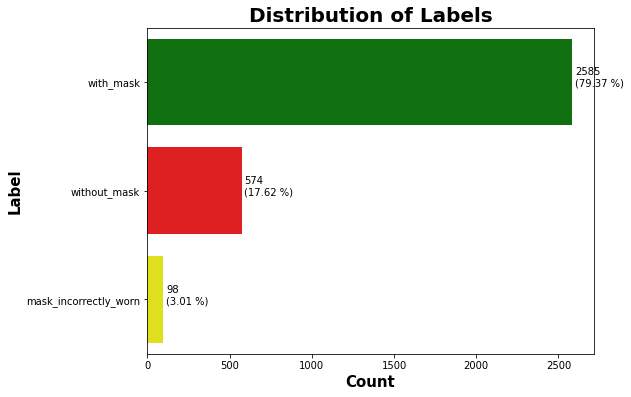

In [93]:
plt.figure(figsize = (8, 6))
barplot = sns.barplot(x = 'count', y = 'label', data = sorted_label_df, orient = 'horizontal', 
                      palette = ['green', 'red', 'yellow'])
plt.title('Distribution of Labels', fontsize = 20, fontweight = 'bold')
plt.xlabel('Count', fontsize = 15, fontweight = 'bold')
plt.ylabel('Label', fontsize = 15, fontweight = 'bold')

for p in barplot.patches:
    width = p.get_width()
    percentage = round(width * 100 / sum(sorted_label_df['count']), 2)
    plt.text(x = width + 15, y = p.get_y() + 0.55 * p.get_height(), s = f'{int(width)}\n({percentage} %)')

plt.show()

In [94]:
image_width, image_height = [], []
for i in range(len(train_df)):
    cropped_image_path = '/content/' + train_df['cropped_image_file'].iloc[i]
    cropped_image = cv2.imread(cropped_image_path)
    image_width.append(cropped_image.shape[0])
    image_height.append(cropped_image.shape[1])

# Visualizing Image Width and Height Distribution

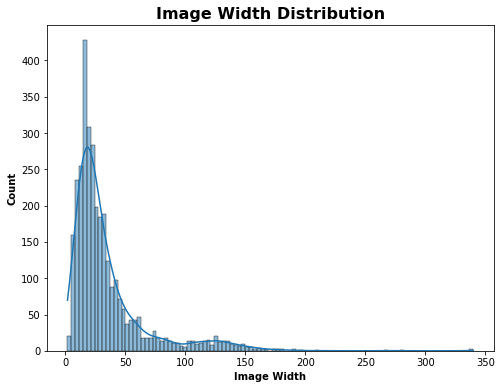

In [95]:
plt.figure(figsize = (8, 6))
sns.histplot(image_width, kde = True)
plt.title('Image Width Distribution', fontsize = 16, fontweight = 'bold')
plt.xlabel('Image Width', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.show()

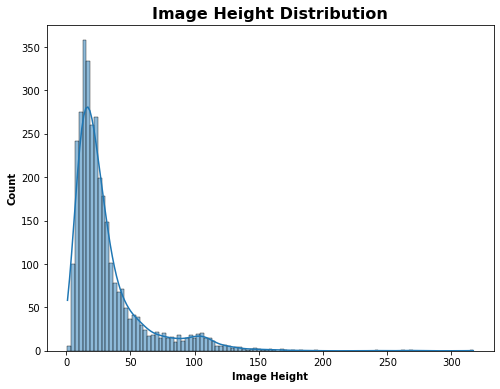

In [96]:
plt.figure(figsize = (8, 6))
sns.histplot(image_height, kde = True)
plt.title('Image Height Distribution', fontsize = 16, fontweight = 'bold')
plt.xlabel('Image Height', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.show()

In [97]:
print('IMAGE WIDTH')
print(f'Min: {min(image_width)}')
print(f'Max: {max(image_width)}')
print(f'Mean: {np.mean(image_width)}')
print(f'Median: {np.median(image_width)}\n')
print('IMAGE HEIGHT')
print(f'Min: {min(image_height)}')
print(f'Max: {max(image_height)}')
print(f'Mean: {np.mean(image_height)}')
print(f'Median: {np.median(image_height)}')

IMAGE WIDTH
Min: 2
Max: 340
Mean: 34.91525944120356
Median: 24.0

IMAGE HEIGHT
Min: 1
Max: 317
Mean: 31.099785078292907
Median: 22.0


In [103]:
min_width, max_width, min_height, max_height = [], [], [], []
for i in range(len(train_df)):
    image_filename = train_df['cropped_image_file'].iloc[i]
    cropped_image_path = '/content/' + image_filename
    cropped_image = cv2.imread(cropped_image_path)
    width = cropped_image.shape[0]
    height = cropped_image.shape[1]
    
    if width == min(image_width):
        min_width.append(image_filename)
    if width == max(image_width):
        max_width.append(image_filename)
    if height == min(image_height):
        min_height.append(image_filename)
    if height == max(image_height):
        max_height.append(image_filename)

Image(s) with Minimum Width:
maksssksksss64-4059.png


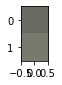

maksssksksss64-4058.png


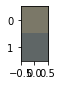

maksssksksss64-4056.png


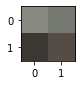



Image(s) with Maximum Width:
maksssksksss106-2092.png


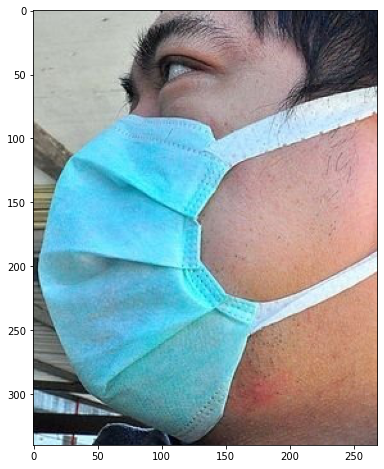



Image(s) with Minimum Height:
maksssksksss64-4059.png


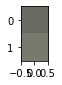

maksssksksss64-4058.png


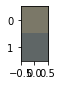



Image(s) with Maximum Height:
maksssksksss446-1363.png


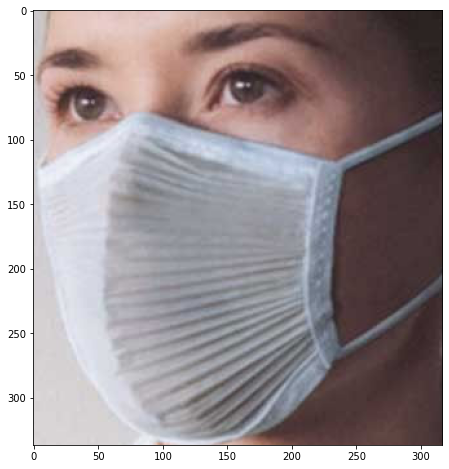

In [108]:
def print_images_filename(images, size):
    for image in images:
        print(image)
        figsize = (1, 1) if size == 'small' else (8, 8)
        display_image_using_filename(image_filename = image, figsize = figsize)
    print('\n')

print('Image(s) with Minimum Width:')
print_images_filename(min_width, 'small')
print('Image(s) with Maximum Width:')
print_images_filename(max_width, 'large')
print('Image(s) with Minimum Height:')
print_images_filename(min_height, 'small')
print('Image(s) with Maximum Height:')
print_images_filename(max_height, 'large')

# Save Train and Test Data CSV File to Google Drive

In [101]:
train_df.to_csv('train_df.csv', index = False)
!cp train_df.csv 'drive/MyDrive/BOOTCAMP FINAL SEASON/Acceleration Program Scholarship/Deep Learning Final Project'

In [102]:
test_df.to_csv('test_df.csv', index = False)
!cp test_df.csv 'drive/MyDrive/BOOTCAMP FINAL SEASON/Acceleration Program Scholarship/Deep Learning Final Project'